In [ ]:
import numpy as np

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

from preprocess import extract_images
from dataset import get_full_list, ChineseCharacterDataset
from models import CVAE
from utils import visualize_images, show_images
from loss import vae_loss

In [ ]:
%load_ext autoreload
%autoreload 2

### Loading and Preprocessing:

In [ ]:
# Set the directory and load the dataset
image_dir = './chinese_chars/pngs'
full_data_list = get_full_list(image_dir)

In [ ]:
train_size = int(1*len(full_data_list))
print("Training Set Size:", train_size)

In [ ]:
train_data_cols = ChineseCharacterDataset(full_data_list[:train_size], cond_type='Half')

# Create data loaders
train_loader_cols = DataLoader(train_data_cols, batch_size=32, shuffle=True)

### Training:

In [6]:
# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [7]:
# Train
def train(model, train_data_set, input_dim, optimizer, scheduler, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0
        for batch_idx, (data, condition) in enumerate(train_data_set):
            print(f'Batch {batch_idx}/{len(train_data_set)} for epoch {epoch+1}')
            data = data.to(device)
            condition = condition.to(device)
            optimizer.zero_grad()
            reconstructed_batch, mu, logvar = model(data, condition)
            loss = vae_loss(reconstructed_batch.view(data.shape[0],1,64,64), data, mu, logvar)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
        scheduler.step()
        print(f'Epoch {epoch+1}, Loss: {train_loss/len(train_data_set.dataset)}')
    print(f'Final Loss: {train_loss/len(train_data_set.dataset)}')

In [8]:
input_dim = 64 * 64
z_dim = 50
condition_dim = 50
num_epochs = 25

In [ ]:
hidden_dim = 6400 * 8
learning_rate = 1e-4


model_1 = CVAE(input_dim, hidden_dim, z_dim, condition_dim).to(device)
optimizer = optim.Adam(model_1.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

train(model_1, train_loader_cols, input_dim, optimizer, scheduler, num_epochs) 

In [ ]:
hidden_dim = 6400 * 10
learning_rate = 1e-4


model_2 = CVAE(input_dim, hidden_dim, z_dim, condition_dim).to(device)
optimizer = optim.Adam(model_2.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

train(model_2, train_loader_cols, input_dim, optimizer, scheduler, num_epochs) 

In [9]:
hidden_dim = 6400 * 10
learning_rate = 1e-3


model_3 = CVAE(input_dim, hidden_dim, z_dim, condition_dim).to(device)
optimizer = optim.Adam(model_3.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

train(model_3, train_loader_cols, input_dim, optimizer, scheduler, num_epochs) 

Batch 0/300 for epoch 1
Batch 1/300 for epoch 1
Batch 2/300 for epoch 1
Batch 3/300 for epoch 1
Batch 4/300 for epoch 1
Batch 5/300 for epoch 1
Batch 6/300 for epoch 1
Batch 7/300 for epoch 1
Batch 8/300 for epoch 1
Batch 9/300 for epoch 1
Batch 10/300 for epoch 1
Batch 11/300 for epoch 1
Batch 12/300 for epoch 1
Batch 13/300 for epoch 1
Batch 14/300 for epoch 1
Batch 15/300 for epoch 1
Batch 16/300 for epoch 1
Batch 17/300 for epoch 1
Batch 18/300 for epoch 1
Batch 19/300 for epoch 1
Batch 20/300 for epoch 1
Batch 21/300 for epoch 1
Batch 22/300 for epoch 1
Batch 23/300 for epoch 1
Batch 24/300 for epoch 1
Batch 25/300 for epoch 1
Batch 26/300 for epoch 1
Batch 27/300 for epoch 1
Batch 28/300 for epoch 1
Batch 29/300 for epoch 1
Batch 30/300 for epoch 1
Batch 31/300 for epoch 1
Batch 32/300 for epoch 1
Batch 33/300 for epoch 1
Batch 34/300 for epoch 1
Batch 35/300 for epoch 1
Batch 36/300 for epoch 1
Batch 37/300 for epoch 1
Batch 38/300 for epoch 1
Batch 39/300 for epoch 1
Batch 40/3

Batch 20/300 for epoch 2
Batch 21/300 for epoch 2
Batch 22/300 for epoch 2
Batch 23/300 for epoch 2
Batch 24/300 for epoch 2
Batch 25/300 for epoch 2
Batch 26/300 for epoch 2
Batch 27/300 for epoch 2
Batch 28/300 for epoch 2
Batch 29/300 for epoch 2
Batch 30/300 for epoch 2
Batch 31/300 for epoch 2
Batch 32/300 for epoch 2
Batch 33/300 for epoch 2
Batch 34/300 for epoch 2
Batch 35/300 for epoch 2
Batch 36/300 for epoch 2
Batch 37/300 for epoch 2
Batch 38/300 for epoch 2
Batch 39/300 for epoch 2
Batch 40/300 for epoch 2
Batch 41/300 for epoch 2
Batch 42/300 for epoch 2
Batch 43/300 for epoch 2
Batch 44/300 for epoch 2
Batch 45/300 for epoch 2
Batch 46/300 for epoch 2
Batch 47/300 for epoch 2
Batch 48/300 for epoch 2
Batch 49/300 for epoch 2
Batch 50/300 for epoch 2
Batch 51/300 for epoch 2
Batch 52/300 for epoch 2
Batch 53/300 for epoch 2
Batch 54/300 for epoch 2
Batch 55/300 for epoch 2
Batch 56/300 for epoch 2
Batch 57/300 for epoch 2
Batch 58/300 for epoch 2
Batch 59/300 for epoch 2


Batch 39/300 for epoch 3
Batch 40/300 for epoch 3
Batch 41/300 for epoch 3
Batch 42/300 for epoch 3
Batch 43/300 for epoch 3
Batch 44/300 for epoch 3
Batch 45/300 for epoch 3
Batch 46/300 for epoch 3
Batch 47/300 for epoch 3
Batch 48/300 for epoch 3
Batch 49/300 for epoch 3
Batch 50/300 for epoch 3
Batch 51/300 for epoch 3
Batch 52/300 for epoch 3
Batch 53/300 for epoch 3
Batch 54/300 for epoch 3
Batch 55/300 for epoch 3
Batch 56/300 for epoch 3
Batch 57/300 for epoch 3
Batch 58/300 for epoch 3
Batch 59/300 for epoch 3
Batch 60/300 for epoch 3
Batch 61/300 for epoch 3
Batch 62/300 for epoch 3
Batch 63/300 for epoch 3
Batch 64/300 for epoch 3
Batch 65/300 for epoch 3
Batch 66/300 for epoch 3
Batch 67/300 for epoch 3
Batch 68/300 for epoch 3
Batch 69/300 for epoch 3
Batch 70/300 for epoch 3
Batch 71/300 for epoch 3
Batch 72/300 for epoch 3
Batch 73/300 for epoch 3
Batch 74/300 for epoch 3
Batch 75/300 for epoch 3
Batch 76/300 for epoch 3
Batch 77/300 for epoch 3
Batch 78/300 for epoch 3


Batch 58/300 for epoch 4
Batch 59/300 for epoch 4
Batch 60/300 for epoch 4
Batch 61/300 for epoch 4
Batch 62/300 for epoch 4
Batch 63/300 for epoch 4
Batch 64/300 for epoch 4
Batch 65/300 for epoch 4
Batch 66/300 for epoch 4
Batch 67/300 for epoch 4
Batch 68/300 for epoch 4
Batch 69/300 for epoch 4
Batch 70/300 for epoch 4
Batch 71/300 for epoch 4
Batch 72/300 for epoch 4
Batch 73/300 for epoch 4
Batch 74/300 for epoch 4
Batch 75/300 for epoch 4
Batch 76/300 for epoch 4
Batch 77/300 for epoch 4
Batch 78/300 for epoch 4
Batch 79/300 for epoch 4
Batch 80/300 for epoch 4
Batch 81/300 for epoch 4
Batch 82/300 for epoch 4
Batch 83/300 for epoch 4
Batch 84/300 for epoch 4
Batch 85/300 for epoch 4
Batch 86/300 for epoch 4
Batch 87/300 for epoch 4
Batch 88/300 for epoch 4
Batch 89/300 for epoch 4
Batch 90/300 for epoch 4
Batch 91/300 for epoch 4
Batch 92/300 for epoch 4
Batch 93/300 for epoch 4
Batch 94/300 for epoch 4
Batch 95/300 for epoch 4
Batch 96/300 for epoch 4
Batch 97/300 for epoch 4


Batch 77/300 for epoch 5
Batch 78/300 for epoch 5
Batch 79/300 for epoch 5
Batch 80/300 for epoch 5
Batch 81/300 for epoch 5
Batch 82/300 for epoch 5
Batch 83/300 for epoch 5
Batch 84/300 for epoch 5
Batch 85/300 for epoch 5
Batch 86/300 for epoch 5
Batch 87/300 for epoch 5
Batch 88/300 for epoch 5
Batch 89/300 for epoch 5
Batch 90/300 for epoch 5
Batch 91/300 for epoch 5
Batch 92/300 for epoch 5
Batch 93/300 for epoch 5
Batch 94/300 for epoch 5
Batch 95/300 for epoch 5
Batch 96/300 for epoch 5
Batch 97/300 for epoch 5
Batch 98/300 for epoch 5
Batch 99/300 for epoch 5
Batch 100/300 for epoch 5
Batch 101/300 for epoch 5
Batch 102/300 for epoch 5
Batch 103/300 for epoch 5
Batch 104/300 for epoch 5
Batch 105/300 for epoch 5
Batch 106/300 for epoch 5
Batch 107/300 for epoch 5
Batch 108/300 for epoch 5
Batch 109/300 for epoch 5
Batch 110/300 for epoch 5
Batch 111/300 for epoch 5
Batch 112/300 for epoch 5
Batch 113/300 for epoch 5
Batch 114/300 for epoch 5
Batch 115/300 for epoch 5
Batch 116

Batch 96/300 for epoch 6
Batch 97/300 for epoch 6
Batch 98/300 for epoch 6
Batch 99/300 for epoch 6
Batch 100/300 for epoch 6
Batch 101/300 for epoch 6
Batch 102/300 for epoch 6
Batch 103/300 for epoch 6
Batch 104/300 for epoch 6
Batch 105/300 for epoch 6
Batch 106/300 for epoch 6
Batch 107/300 for epoch 6
Batch 108/300 for epoch 6
Batch 109/300 for epoch 6
Batch 110/300 for epoch 6
Batch 111/300 for epoch 6
Batch 112/300 for epoch 6
Batch 113/300 for epoch 6
Batch 114/300 for epoch 6
Batch 115/300 for epoch 6
Batch 116/300 for epoch 6
Batch 117/300 for epoch 6
Batch 118/300 for epoch 6
Batch 119/300 for epoch 6
Batch 120/300 for epoch 6
Batch 121/300 for epoch 6
Batch 122/300 for epoch 6
Batch 123/300 for epoch 6
Batch 124/300 for epoch 6
Batch 125/300 for epoch 6
Batch 126/300 for epoch 6
Batch 127/300 for epoch 6
Batch 128/300 for epoch 6
Batch 129/300 for epoch 6
Batch 130/300 for epoch 6
Batch 131/300 for epoch 6
Batch 132/300 for epoch 6
Batch 133/300 for epoch 6
Batch 134/300 fo

Batch 115/300 for epoch 7
Batch 116/300 for epoch 7
Batch 117/300 for epoch 7
Batch 118/300 for epoch 7
Batch 119/300 for epoch 7
Batch 120/300 for epoch 7
Batch 121/300 for epoch 7
Batch 122/300 for epoch 7
Batch 123/300 for epoch 7
Batch 124/300 for epoch 7
Batch 125/300 for epoch 7
Batch 126/300 for epoch 7
Batch 127/300 for epoch 7
Batch 128/300 for epoch 7
Batch 129/300 for epoch 7
Batch 130/300 for epoch 7
Batch 131/300 for epoch 7
Batch 132/300 for epoch 7
Batch 133/300 for epoch 7
Batch 134/300 for epoch 7
Batch 135/300 for epoch 7
Batch 136/300 for epoch 7
Batch 137/300 for epoch 7
Batch 138/300 for epoch 7
Batch 139/300 for epoch 7
Batch 140/300 for epoch 7
Batch 141/300 for epoch 7
Batch 142/300 for epoch 7
Batch 143/300 for epoch 7
Batch 144/300 for epoch 7
Batch 145/300 for epoch 7
Batch 146/300 for epoch 7
Batch 147/300 for epoch 7
Batch 148/300 for epoch 7
Batch 149/300 for epoch 7
Batch 150/300 for epoch 7
Batch 151/300 for epoch 7
Batch 152/300 for epoch 7
Batch 153/30

Batch 134/300 for epoch 8
Batch 135/300 for epoch 8
Batch 136/300 for epoch 8
Batch 137/300 for epoch 8
Batch 138/300 for epoch 8
Batch 139/300 for epoch 8
Batch 140/300 for epoch 8
Batch 141/300 for epoch 8
Batch 142/300 for epoch 8
Batch 143/300 for epoch 8
Batch 144/300 for epoch 8
Batch 145/300 for epoch 8
Batch 146/300 for epoch 8
Batch 147/300 for epoch 8
Batch 148/300 for epoch 8
Batch 149/300 for epoch 8
Batch 150/300 for epoch 8
Batch 151/300 for epoch 8
Batch 152/300 for epoch 8
Batch 153/300 for epoch 8
Batch 154/300 for epoch 8
Batch 155/300 for epoch 8
Batch 156/300 for epoch 8
Batch 157/300 for epoch 8
Batch 158/300 for epoch 8
Batch 159/300 for epoch 8
Batch 160/300 for epoch 8
Batch 161/300 for epoch 8
Batch 162/300 for epoch 8
Batch 163/300 for epoch 8
Batch 164/300 for epoch 8
Batch 165/300 for epoch 8
Batch 166/300 for epoch 8
Batch 167/300 for epoch 8
Batch 168/300 for epoch 8
Batch 169/300 for epoch 8
Batch 170/300 for epoch 8
Batch 171/300 for epoch 8
Batch 172/30

Batch 153/300 for epoch 9
Batch 154/300 for epoch 9
Batch 155/300 for epoch 9
Batch 156/300 for epoch 9
Batch 157/300 for epoch 9
Batch 158/300 for epoch 9
Batch 159/300 for epoch 9
Batch 160/300 for epoch 9
Batch 161/300 for epoch 9
Batch 162/300 for epoch 9
Batch 163/300 for epoch 9
Batch 164/300 for epoch 9
Batch 165/300 for epoch 9
Batch 166/300 for epoch 9
Batch 167/300 for epoch 9
Batch 168/300 for epoch 9
Batch 169/300 for epoch 9
Batch 170/300 for epoch 9
Batch 171/300 for epoch 9
Batch 172/300 for epoch 9
Batch 173/300 for epoch 9
Batch 174/300 for epoch 9
Batch 175/300 for epoch 9
Batch 176/300 for epoch 9
Batch 177/300 for epoch 9
Batch 178/300 for epoch 9
Batch 179/300 for epoch 9
Batch 180/300 for epoch 9
Batch 181/300 for epoch 9
Batch 182/300 for epoch 9
Batch 183/300 for epoch 9
Batch 184/300 for epoch 9
Batch 185/300 for epoch 9
Batch 186/300 for epoch 9
Batch 187/300 for epoch 9
Batch 188/300 for epoch 9
Batch 189/300 for epoch 9
Batch 190/300 for epoch 9
Batch 191/30

Batch 165/300 for epoch 10
Batch 166/300 for epoch 10
Batch 167/300 for epoch 10
Batch 168/300 for epoch 10
Batch 169/300 for epoch 10
Batch 170/300 for epoch 10
Batch 171/300 for epoch 10
Batch 172/300 for epoch 10
Batch 173/300 for epoch 10
Batch 174/300 for epoch 10
Batch 175/300 for epoch 10
Batch 176/300 for epoch 10
Batch 177/300 for epoch 10
Batch 178/300 for epoch 10
Batch 179/300 for epoch 10
Batch 180/300 for epoch 10
Batch 181/300 for epoch 10
Batch 182/300 for epoch 10
Batch 183/300 for epoch 10
Batch 184/300 for epoch 10
Batch 185/300 for epoch 10
Batch 186/300 for epoch 10
Batch 187/300 for epoch 10
Batch 188/300 for epoch 10
Batch 189/300 for epoch 10
Batch 190/300 for epoch 10
Batch 191/300 for epoch 10
Batch 192/300 for epoch 10
Batch 193/300 for epoch 10
Batch 194/300 for epoch 10
Batch 195/300 for epoch 10
Batch 196/300 for epoch 10
Batch 197/300 for epoch 10
Batch 198/300 for epoch 10
Batch 199/300 for epoch 10
Batch 200/300 for epoch 10
Batch 201/300 for epoch 10
B

Batch 172/300 for epoch 11
Batch 173/300 for epoch 11
Batch 174/300 for epoch 11
Batch 175/300 for epoch 11
Batch 176/300 for epoch 11
Batch 177/300 for epoch 11
Batch 178/300 for epoch 11
Batch 179/300 for epoch 11
Batch 180/300 for epoch 11
Batch 181/300 for epoch 11
Batch 182/300 for epoch 11
Batch 183/300 for epoch 11
Batch 184/300 for epoch 11
Batch 185/300 for epoch 11
Batch 186/300 for epoch 11
Batch 187/300 for epoch 11
Batch 188/300 for epoch 11
Batch 189/300 for epoch 11
Batch 190/300 for epoch 11
Batch 191/300 for epoch 11
Batch 192/300 for epoch 11
Batch 193/300 for epoch 11
Batch 194/300 for epoch 11
Batch 195/300 for epoch 11
Batch 196/300 for epoch 11
Batch 197/300 for epoch 11
Batch 198/300 for epoch 11
Batch 199/300 for epoch 11
Batch 200/300 for epoch 11
Batch 201/300 for epoch 11
Batch 202/300 for epoch 11
Batch 203/300 for epoch 11
Batch 204/300 for epoch 11
Batch 205/300 for epoch 11
Batch 206/300 for epoch 11
Batch 207/300 for epoch 11
Batch 208/300 for epoch 11
B

Batch 179/300 for epoch 12
Batch 180/300 for epoch 12
Batch 181/300 for epoch 12
Batch 182/300 for epoch 12
Batch 183/300 for epoch 12
Batch 184/300 for epoch 12
Batch 185/300 for epoch 12
Batch 186/300 for epoch 12
Batch 187/300 for epoch 12
Batch 188/300 for epoch 12
Batch 189/300 for epoch 12
Batch 190/300 for epoch 12
Batch 191/300 for epoch 12
Batch 192/300 for epoch 12
Batch 193/300 for epoch 12
Batch 194/300 for epoch 12
Batch 195/300 for epoch 12
Batch 196/300 for epoch 12
Batch 197/300 for epoch 12
Batch 198/300 for epoch 12
Batch 199/300 for epoch 12
Batch 200/300 for epoch 12
Batch 201/300 for epoch 12
Batch 202/300 for epoch 12
Batch 203/300 for epoch 12
Batch 204/300 for epoch 12
Batch 205/300 for epoch 12
Batch 206/300 for epoch 12
Batch 207/300 for epoch 12
Batch 208/300 for epoch 12
Batch 209/300 for epoch 12
Batch 210/300 for epoch 12
Batch 211/300 for epoch 12
Batch 212/300 for epoch 12
Batch 213/300 for epoch 12
Batch 214/300 for epoch 12
Batch 215/300 for epoch 12
B

Batch 186/300 for epoch 13
Batch 187/300 for epoch 13
Batch 188/300 for epoch 13
Batch 189/300 for epoch 13
Batch 190/300 for epoch 13
Batch 191/300 for epoch 13
Batch 192/300 for epoch 13
Batch 193/300 for epoch 13
Batch 194/300 for epoch 13
Batch 195/300 for epoch 13
Batch 196/300 for epoch 13
Batch 197/300 for epoch 13
Batch 198/300 for epoch 13
Batch 199/300 for epoch 13
Batch 200/300 for epoch 13
Batch 201/300 for epoch 13
Batch 202/300 for epoch 13
Batch 203/300 for epoch 13
Batch 204/300 for epoch 13
Batch 205/300 for epoch 13
Batch 206/300 for epoch 13
Batch 207/300 for epoch 13
Batch 208/300 for epoch 13
Batch 209/300 for epoch 13
Batch 210/300 for epoch 13
Batch 211/300 for epoch 13
Batch 212/300 for epoch 13
Batch 213/300 for epoch 13
Batch 214/300 for epoch 13
Batch 215/300 for epoch 13
Batch 216/300 for epoch 13
Batch 217/300 for epoch 13
Batch 218/300 for epoch 13
Batch 219/300 for epoch 13
Batch 220/300 for epoch 13
Batch 221/300 for epoch 13
Batch 222/300 for epoch 13
B

Batch 193/300 for epoch 14
Batch 194/300 for epoch 14
Batch 195/300 for epoch 14
Batch 196/300 for epoch 14
Batch 197/300 for epoch 14
Batch 198/300 for epoch 14
Batch 199/300 for epoch 14
Batch 200/300 for epoch 14
Batch 201/300 for epoch 14
Batch 202/300 for epoch 14
Batch 203/300 for epoch 14
Batch 204/300 for epoch 14
Batch 205/300 for epoch 14
Batch 206/300 for epoch 14
Batch 207/300 for epoch 14
Batch 208/300 for epoch 14
Batch 209/300 for epoch 14
Batch 210/300 for epoch 14
Batch 211/300 for epoch 14
Batch 212/300 for epoch 14
Batch 213/300 for epoch 14
Batch 214/300 for epoch 14
Batch 215/300 for epoch 14
Batch 216/300 for epoch 14
Batch 217/300 for epoch 14
Batch 218/300 for epoch 14
Batch 219/300 for epoch 14
Batch 220/300 for epoch 14
Batch 221/300 for epoch 14
Batch 222/300 for epoch 14
Batch 223/300 for epoch 14
Batch 224/300 for epoch 14
Batch 225/300 for epoch 14
Batch 226/300 for epoch 14
Batch 227/300 for epoch 14
Batch 228/300 for epoch 14
Batch 229/300 for epoch 14
B

Batch 200/300 for epoch 15
Batch 201/300 for epoch 15
Batch 202/300 for epoch 15
Batch 203/300 for epoch 15
Batch 204/300 for epoch 15
Batch 205/300 for epoch 15
Batch 206/300 for epoch 15
Batch 207/300 for epoch 15
Batch 208/300 for epoch 15
Batch 209/300 for epoch 15
Batch 210/300 for epoch 15
Batch 211/300 for epoch 15
Batch 212/300 for epoch 15
Batch 213/300 for epoch 15
Batch 214/300 for epoch 15
Batch 215/300 for epoch 15
Batch 216/300 for epoch 15
Batch 217/300 for epoch 15
Batch 218/300 for epoch 15
Batch 219/300 for epoch 15
Batch 220/300 for epoch 15
Batch 221/300 for epoch 15
Batch 222/300 for epoch 15
Batch 223/300 for epoch 15
Batch 224/300 for epoch 15
Batch 225/300 for epoch 15
Batch 226/300 for epoch 15
Batch 227/300 for epoch 15
Batch 228/300 for epoch 15
Batch 229/300 for epoch 15
Batch 230/300 for epoch 15
Batch 231/300 for epoch 15
Batch 232/300 for epoch 15
Batch 233/300 for epoch 15
Batch 234/300 for epoch 15
Batch 235/300 for epoch 15
Batch 236/300 for epoch 15
B

Batch 207/300 for epoch 16
Batch 208/300 for epoch 16
Batch 209/300 for epoch 16
Batch 210/300 for epoch 16
Batch 211/300 for epoch 16
Batch 212/300 for epoch 16
Batch 213/300 for epoch 16
Batch 214/300 for epoch 16
Batch 215/300 for epoch 16
Batch 216/300 for epoch 16
Batch 217/300 for epoch 16
Batch 218/300 for epoch 16
Batch 219/300 for epoch 16
Batch 220/300 for epoch 16
Batch 221/300 for epoch 16
Batch 222/300 for epoch 16
Batch 223/300 for epoch 16
Batch 224/300 for epoch 16
Batch 225/300 for epoch 16
Batch 226/300 for epoch 16
Batch 227/300 for epoch 16
Batch 228/300 for epoch 16
Batch 229/300 for epoch 16
Batch 230/300 for epoch 16
Batch 231/300 for epoch 16
Batch 232/300 for epoch 16
Batch 233/300 for epoch 16
Batch 234/300 for epoch 16
Batch 235/300 for epoch 16
Batch 236/300 for epoch 16
Batch 237/300 for epoch 16
Batch 238/300 for epoch 16
Batch 239/300 for epoch 16
Batch 240/300 for epoch 16
Batch 241/300 for epoch 16
Batch 242/300 for epoch 16
Batch 243/300 for epoch 16
B

Batch 214/300 for epoch 17
Batch 215/300 for epoch 17
Batch 216/300 for epoch 17
Batch 217/300 for epoch 17
Batch 218/300 for epoch 17
Batch 219/300 for epoch 17
Batch 220/300 for epoch 17
Batch 221/300 for epoch 17
Batch 222/300 for epoch 17
Batch 223/300 for epoch 17
Batch 224/300 for epoch 17
Batch 225/300 for epoch 17
Batch 226/300 for epoch 17
Batch 227/300 for epoch 17
Batch 228/300 for epoch 17
Batch 229/300 for epoch 17
Batch 230/300 for epoch 17
Batch 231/300 for epoch 17
Batch 232/300 for epoch 17
Batch 233/300 for epoch 17
Batch 234/300 for epoch 17
Batch 235/300 for epoch 17
Batch 236/300 for epoch 17
Batch 237/300 for epoch 17
Batch 238/300 for epoch 17
Batch 239/300 for epoch 17
Batch 240/300 for epoch 17
Batch 241/300 for epoch 17
Batch 242/300 for epoch 17
Batch 243/300 for epoch 17
Batch 244/300 for epoch 17
Batch 245/300 for epoch 17
Batch 246/300 for epoch 17
Batch 247/300 for epoch 17
Batch 248/300 for epoch 17
Batch 249/300 for epoch 17
Batch 250/300 for epoch 17
B

Batch 221/300 for epoch 18
Batch 222/300 for epoch 18
Batch 223/300 for epoch 18
Batch 224/300 for epoch 18
Batch 225/300 for epoch 18
Batch 226/300 for epoch 18
Batch 227/300 for epoch 18
Batch 228/300 for epoch 18
Batch 229/300 for epoch 18
Batch 230/300 for epoch 18
Batch 231/300 for epoch 18
Batch 232/300 for epoch 18
Batch 233/300 for epoch 18
Batch 234/300 for epoch 18
Batch 235/300 for epoch 18
Batch 236/300 for epoch 18
Batch 237/300 for epoch 18
Batch 238/300 for epoch 18
Batch 239/300 for epoch 18
Batch 240/300 for epoch 18
Batch 241/300 for epoch 18
Batch 242/300 for epoch 18
Batch 243/300 for epoch 18
Batch 244/300 for epoch 18
Batch 245/300 for epoch 18
Batch 246/300 for epoch 18
Batch 247/300 for epoch 18
Batch 248/300 for epoch 18
Batch 249/300 for epoch 18
Batch 250/300 for epoch 18
Batch 251/300 for epoch 18
Batch 252/300 for epoch 18
Batch 253/300 for epoch 18
Batch 254/300 for epoch 18
Batch 255/300 for epoch 18
Batch 256/300 for epoch 18
Batch 257/300 for epoch 18
B

Batch 228/300 for epoch 19
Batch 229/300 for epoch 19
Batch 230/300 for epoch 19
Batch 231/300 for epoch 19
Batch 232/300 for epoch 19
Batch 233/300 for epoch 19
Batch 234/300 for epoch 19
Batch 235/300 for epoch 19
Batch 236/300 for epoch 19
Batch 237/300 for epoch 19
Batch 238/300 for epoch 19
Batch 239/300 for epoch 19
Batch 240/300 for epoch 19
Batch 241/300 for epoch 19
Batch 242/300 for epoch 19
Batch 243/300 for epoch 19
Batch 244/300 for epoch 19
Batch 245/300 for epoch 19
Batch 246/300 for epoch 19
Batch 247/300 for epoch 19
Batch 248/300 for epoch 19
Batch 249/300 for epoch 19
Batch 250/300 for epoch 19
Batch 251/300 for epoch 19
Batch 252/300 for epoch 19
Batch 253/300 for epoch 19
Batch 254/300 for epoch 19
Batch 255/300 for epoch 19
Batch 256/300 for epoch 19
Batch 257/300 for epoch 19
Batch 258/300 for epoch 19
Batch 259/300 for epoch 19
Batch 260/300 for epoch 19
Batch 261/300 for epoch 19
Batch 262/300 for epoch 19
Batch 263/300 for epoch 19
Batch 264/300 for epoch 19
B

Batch 235/300 for epoch 20
Batch 236/300 for epoch 20
Batch 237/300 for epoch 20
Batch 238/300 for epoch 20
Batch 239/300 for epoch 20
Batch 240/300 for epoch 20
Batch 241/300 for epoch 20
Batch 242/300 for epoch 20
Batch 243/300 for epoch 20
Batch 244/300 for epoch 20
Batch 245/300 for epoch 20
Batch 246/300 for epoch 20
Batch 247/300 for epoch 20
Batch 248/300 for epoch 20
Batch 249/300 for epoch 20
Batch 250/300 for epoch 20
Batch 251/300 for epoch 20
Batch 252/300 for epoch 20
Batch 253/300 for epoch 20
Batch 254/300 for epoch 20
Batch 255/300 for epoch 20
Batch 256/300 for epoch 20
Batch 257/300 for epoch 20
Batch 258/300 for epoch 20
Batch 259/300 for epoch 20
Batch 260/300 for epoch 20
Batch 261/300 for epoch 20
Batch 262/300 for epoch 20
Batch 263/300 for epoch 20
Batch 264/300 for epoch 20
Batch 265/300 for epoch 20
Batch 266/300 for epoch 20
Batch 267/300 for epoch 20
Batch 268/300 for epoch 20
Batch 269/300 for epoch 20
Batch 270/300 for epoch 20
Batch 271/300 for epoch 20
B

Batch 242/300 for epoch 21
Batch 243/300 for epoch 21
Batch 244/300 for epoch 21
Batch 245/300 for epoch 21
Batch 246/300 for epoch 21
Batch 247/300 for epoch 21
Batch 248/300 for epoch 21
Batch 249/300 for epoch 21
Batch 250/300 for epoch 21
Batch 251/300 for epoch 21
Batch 252/300 for epoch 21
Batch 253/300 for epoch 21
Batch 254/300 for epoch 21
Batch 255/300 for epoch 21
Batch 256/300 for epoch 21
Batch 257/300 for epoch 21
Batch 258/300 for epoch 21
Batch 259/300 for epoch 21
Batch 260/300 for epoch 21
Batch 261/300 for epoch 21
Batch 262/300 for epoch 21
Batch 263/300 for epoch 21
Batch 264/300 for epoch 21
Batch 265/300 for epoch 21
Batch 266/300 for epoch 21
Batch 267/300 for epoch 21
Batch 268/300 for epoch 21
Batch 269/300 for epoch 21
Batch 270/300 for epoch 21
Batch 271/300 for epoch 21
Batch 272/300 for epoch 21
Batch 273/300 for epoch 21
Batch 274/300 for epoch 21
Batch 275/300 for epoch 21
Batch 276/300 for epoch 21
Batch 277/300 for epoch 21
Batch 278/300 for epoch 21
B

Batch 249/300 for epoch 22
Batch 250/300 for epoch 22
Batch 251/300 for epoch 22
Batch 252/300 for epoch 22
Batch 253/300 for epoch 22
Batch 254/300 for epoch 22
Batch 255/300 for epoch 22
Batch 256/300 for epoch 22
Batch 257/300 for epoch 22
Batch 258/300 for epoch 22
Batch 259/300 for epoch 22
Batch 260/300 for epoch 22
Batch 261/300 for epoch 22
Batch 262/300 for epoch 22
Batch 263/300 for epoch 22
Batch 264/300 for epoch 22
Batch 265/300 for epoch 22
Batch 266/300 for epoch 22
Batch 267/300 for epoch 22
Batch 268/300 for epoch 22
Batch 269/300 for epoch 22
Batch 270/300 for epoch 22
Batch 271/300 for epoch 22
Batch 272/300 for epoch 22
Batch 273/300 for epoch 22
Batch 274/300 for epoch 22
Batch 275/300 for epoch 22
Batch 276/300 for epoch 22
Batch 277/300 for epoch 22
Batch 278/300 for epoch 22
Batch 279/300 for epoch 22
Batch 280/300 for epoch 22
Batch 281/300 for epoch 22
Batch 282/300 for epoch 22
Batch 283/300 for epoch 22
Batch 284/300 for epoch 22
Batch 285/300 for epoch 22
B

Batch 256/300 for epoch 23
Batch 257/300 for epoch 23
Batch 258/300 for epoch 23
Batch 259/300 for epoch 23
Batch 260/300 for epoch 23
Batch 261/300 for epoch 23
Batch 262/300 for epoch 23
Batch 263/300 for epoch 23
Batch 264/300 for epoch 23
Batch 265/300 for epoch 23
Batch 266/300 for epoch 23
Batch 267/300 for epoch 23
Batch 268/300 for epoch 23
Batch 269/300 for epoch 23
Batch 270/300 for epoch 23
Batch 271/300 for epoch 23
Batch 272/300 for epoch 23
Batch 273/300 for epoch 23
Batch 274/300 for epoch 23
Batch 275/300 for epoch 23
Batch 276/300 for epoch 23
Batch 277/300 for epoch 23
Batch 278/300 for epoch 23
Batch 279/300 for epoch 23
Batch 280/300 for epoch 23
Batch 281/300 for epoch 23
Batch 282/300 for epoch 23
Batch 283/300 for epoch 23
Batch 284/300 for epoch 23
Batch 285/300 for epoch 23
Batch 286/300 for epoch 23
Batch 287/300 for epoch 23
Batch 288/300 for epoch 23
Batch 289/300 for epoch 23
Batch 290/300 for epoch 23
Batch 291/300 for epoch 23
Batch 292/300 for epoch 23
B

Batch 263/300 for epoch 24
Batch 264/300 for epoch 24
Batch 265/300 for epoch 24
Batch 266/300 for epoch 24
Batch 267/300 for epoch 24
Batch 268/300 for epoch 24
Batch 269/300 for epoch 24
Batch 270/300 for epoch 24
Batch 271/300 for epoch 24
Batch 272/300 for epoch 24
Batch 273/300 for epoch 24
Batch 274/300 for epoch 24
Batch 275/300 for epoch 24
Batch 276/300 for epoch 24
Batch 277/300 for epoch 24
Batch 278/300 for epoch 24
Batch 279/300 for epoch 24
Batch 280/300 for epoch 24
Batch 281/300 for epoch 24
Batch 282/300 for epoch 24
Batch 283/300 for epoch 24
Batch 284/300 for epoch 24
Batch 285/300 for epoch 24
Batch 286/300 for epoch 24
Batch 287/300 for epoch 24
Batch 288/300 for epoch 24
Batch 289/300 for epoch 24
Batch 290/300 for epoch 24
Batch 291/300 for epoch 24
Batch 292/300 for epoch 24
Batch 293/300 for epoch 24
Batch 294/300 for epoch 24
Batch 295/300 for epoch 24
Batch 296/300 for epoch 24
Batch 297/300 for epoch 24
Batch 298/300 for epoch 24
Batch 299/300 for epoch 24
E

Batch 270/300 for epoch 25
Batch 271/300 for epoch 25
Batch 272/300 for epoch 25
Batch 273/300 for epoch 25
Batch 274/300 for epoch 25
Batch 275/300 for epoch 25
Batch 276/300 for epoch 25
Batch 277/300 for epoch 25
Batch 278/300 for epoch 25
Batch 279/300 for epoch 25
Batch 280/300 for epoch 25
Batch 281/300 for epoch 25
Batch 282/300 for epoch 25
Batch 283/300 for epoch 25
Batch 284/300 for epoch 25
Batch 285/300 for epoch 25
Batch 286/300 for epoch 25
Batch 287/300 for epoch 25
Batch 288/300 for epoch 25
Batch 289/300 for epoch 25
Batch 290/300 for epoch 25
Batch 291/300 for epoch 25
Batch 292/300 for epoch 25
Batch 293/300 for epoch 25
Batch 294/300 for epoch 25
Batch 295/300 for epoch 25
Batch 296/300 for epoch 25
Batch 297/300 for epoch 25
Batch 298/300 for epoch 25
Batch 299/300 for epoch 25
Epoch 25, Loss: 638.122403219943
Final Loss: 638.122403219943


### Generating Images:

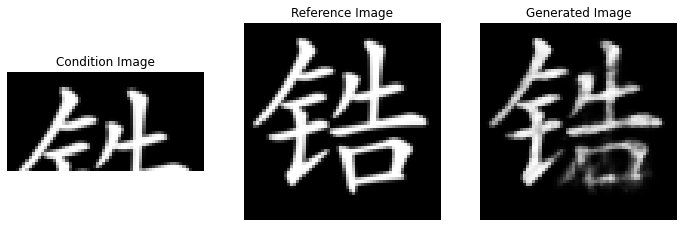

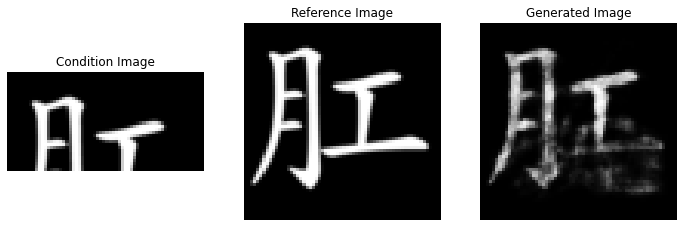

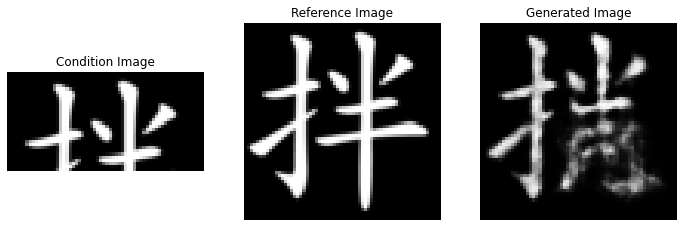

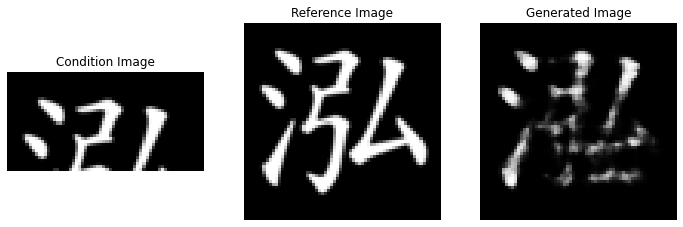

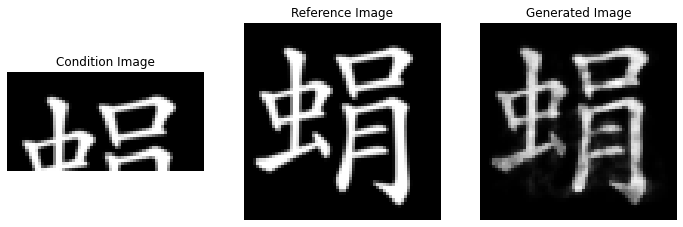

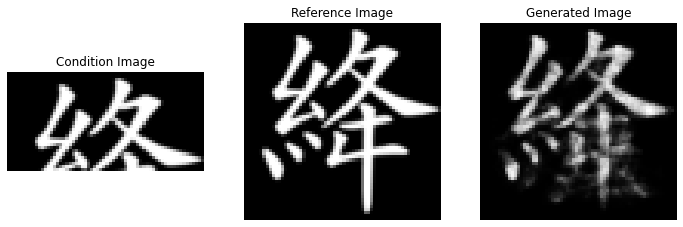

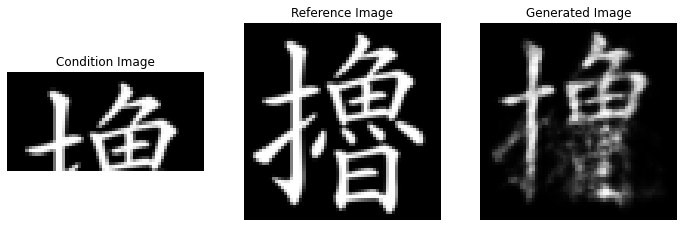

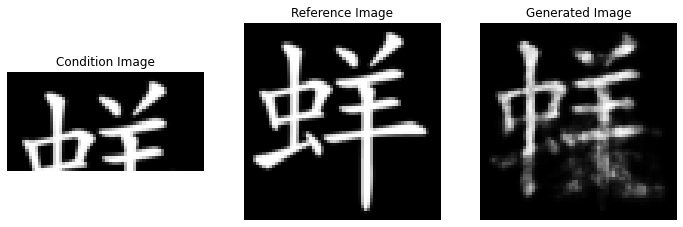

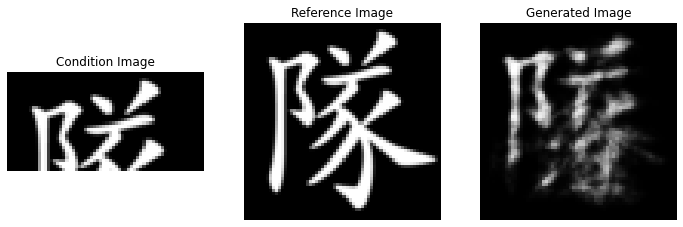

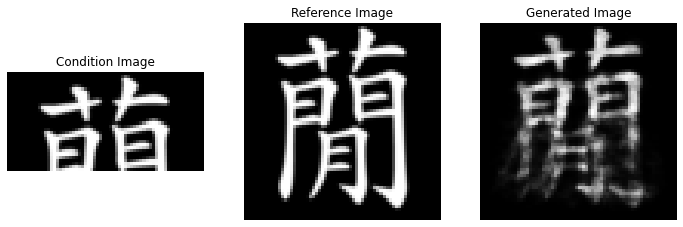

In [15]:
import matplotlib.pyplot as plt
import torch

def plot_generated_images(model, data_loader, num_images, batch_size, device='cpu'):
    model.eval()
    left_images = num_images
    with torch.no_grad():
        for batch_idx, (data, condition) in enumerate(data_loader):
            condition = condition.to(device)
            data = data.to(device)
            if left_images == 0:
                break
            
            z = torch.randn(batch_size, model.z_dim).to(device)
            cond_encoded = model.forward_condition_encoder(condition)
            sample = model.decode(z, cond_encoded).cpu()
            sample = sample.view(batch_size, 1, 64, 64)
            
            if left_images > batch_size:
                print_images = batch_size
                left_images = left_images-batch_size
            else:
                print_images = left_images
                left_images = 0

            for i in range(print_images):
                ref = data[i].cpu().detach().numpy().reshape(64, 64)
                img = sample[i].cpu().detach().numpy().reshape(64, 64)
                
                # Handle condition image with random shape
                cond = condition[i].cpu().detach().numpy()
                if len(cond.shape) > 2:
                    cond = cond[0]  # Select the first channel if condition is multi-channel
                cond_shape = cond.shape
                cond_resized = cond.reshape(cond_shape)

                plt.figure(figsize=(12, 4))

                # Plot condition image
                plt.subplot(1, 3, 1)
                plt.title('Condition Image')
                plt.imshow(cond_resized, cmap='gray')
                plt.axis('off')

                # Plot reference image
                plt.subplot(1, 3, 2)
                plt.title('Reference Image')
                plt.imshow(ref, cmap='gray')
                plt.axis('off')

                # Plot generated image
                plt.subplot(1, 3, 3)
                plt.title('Generated Image')
                plt.imshow(img, cmap='gray')
                plt.axis('off')

                plt.show()


plot_generated_images(model_3, train_loader_cols, num_images=10, batch_size=32, device=device)